<a href="https://colab.research.google.com/github/WilliamVoster/predictHousePricesTeamProject/blob/master/Predict%20house%20price%20(Short%20version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## annoying error handling :(
pd.options.mode.chained_assignment = None


githubURL = "https://raw.githubusercontent.com/WilliamVoster/predictHousePricesTeamProject/master/house-prices-advanced-regression-techniques/train.csv"

dataTrain = pd.read_csv(githubURL)

githubURL_testData = "https://raw.githubusercontent.com/WilliamVoster/predictHousePricesTeamProject/master/house-prices-advanced-regression-techniques/test.csv"

dataTest = pd.read_csv(githubURL_testData)



normalizedTrainingData = dataTrain.copy()
# Function for replacing string values with more comuter-readable values from 0-1
def replaceVal(columnName, filter2d = [["empty", 0]]):

  columnLength = len(normalizedTrainingData[columnName])
  data = [None] * columnLength

  for i in range(columnLength):
    data[i] = str(normalizedTrainingData[columnName][i])

  for i in range(columnLength):
    for j in range(len(filter2d)):
      if data[i] == filter2d[j][0]:
        #print(data[i], filter2d[j][1])
        data[i] = filter2d[j][1]
        
  for i in range(columnLength):
    # normalizedTrainingData.loc[columnName, i] = data[i]
    normalizedTrainingData[columnName][i] = data[i]
    dataTest[columnName][i] = data[i] # also updating/normalizing the testing data
  
  # print(normalizedTrainingData[columnName])
  # print(normalizedTrainingData[columnName].unique())
  # print(dataTrain[columnName].unique())
  # print(normalizedTrainingData[columnName].describe())

  return {
      "nameArr" : normalizedTrainingData[columnName].unique(), 
      "valArr" : dataTrain[columnName].unique(), "data" : normalizedTrainingData[columnName]
  }

#### Data exploration


In [0]:
print(dataTrain.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
attributesForPreditionFromCorrelationMatrix = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]

importantAttributes = ["BedroomAbvGr", "FullBath", "HalfBath", "GarageArea", "GarageQual",  "GarageType",  "GarageCond",  "Heating"]
LotShapeList = dataTrain["LotShape"].unique().tolist()
for i in importantAttributes:
  print(dataTrain[i].unique().tolist())
  for j in dataTrain[i].unique().tolist():
    
    if str(j) == "nan":
      print("OOOOAKJSBDKASBDKASBD")
  

[3, 4, 1, 2, 0, 5, 6, 8]
[2, 1, 3, 0]
[1, 0, 2]
[548, 460, 608, 642, 836, 480, 636, 484, 468, 205, 384, 736, 352, 840, 576, 516, 294, 853, 280, 534, 572, 270, 890, 772, 319, 240, 250, 271, 447, 556, 691, 672, 498, 246, 0, 440, 308, 504, 300, 670, 826, 386, 388, 528, 894, 565, 641, 288, 645, 852, 558, 220, 667, 360, 427, 490, 379, 297, 283, 509, 405, 758, 461, 400, 462, 420, 432, 506, 684, 472, 366, 476, 410, 740, 648, 273, 546, 325, 792, 450, 180, 430, 594, 390, 540, 264, 530, 435, 453, 750, 487, 624, 471, 318, 766, 660, 470, 720, 577, 380, 434, 866, 495, 564, 312, 625, 680, 678, 726, 532, 216, 303, 789, 511, 616, 521, 451, 1166, 252, 497, 682, 666, 786, 795, 856, 473, 398, 500, 349, 454, 644, 299, 210, 431, 438, 675, 968, 721, 336, 810, 494, 457, 818, 463, 604, 389, 538, 520, 309, 429, 673, 884, 868, 492, 413, 924, 1053, 439, 671, 338, 573, 732, 505, 575, 626, 898, 529, 685, 281, 539, 418, 588, 282, 375, 683, 843, 552, 870, 888, 746, 708, 513, 1025, 656, 872, 292, 441, 189, 880, 676, 

#### Normalizing attributes (Calling function)

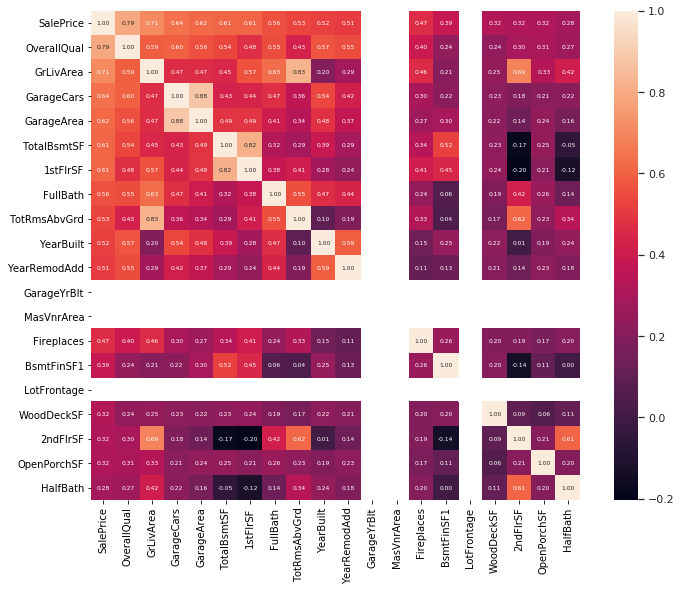

In [0]:
import seaborn as sns

heatMap = normalizedTrainingData.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(heatMap, vmax=.8, square=True);

#Straigt from tutorial no kaggle!!

k = 20 #number of variables for heatmap
cols = heatMap.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataTrain[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
# A fix for the wierd "Exterior2nd" which had wrong values, should have same options as "Esterior1st"
attr = normalizedTrainingData["Exterior2nd"]
for i in range(len(attr)):
  if attr[i] == "Wd Shng":
    normalizedTrainingData["Exterior2nd"][i] = "WdShing"
    dataTest["Exterior2nd"][i] = "WdShing"
  elif attr[i] == "Brk Cmn":
    normalizedTrainingData["Exterior2nd"][i] = "BrkComm"
    dataTest["Exterior2nd"][i] = "BrkComm"
  elif attr[i] == "CmentBd":
    normalizedTrainingData["Exterior2nd"][i] = "CemntBd"
    dataTest["Exterior2nd"][i] = "CemntBd"

In [0]:
alleyConvertingFilter = [["nan", 1], ["Grvl", 0], ["Pave", 0.5]]
replaceVal("Alley", alleyConvertingFilter)

lotShapeConvertingFilter = [["Reg", 1], ["IR1", 0.67], ["IR2", 0.33], ["IR3", 0]]
replaceVal("LotShape", lotShapeConvertingFilter)

# heatingFilter = [["GasA", 0], ["GasW", 0.2], ["Grav", 0.4], ["Wall", 0.6], ["OthW", 0.8], ["Floor", 1]]   OLD
heatingFilter = [["GasA", 1], ["GasW", 0.67], ["Grav", 0.33], ["Wall", 0], ["OthW", 0], ["Floor", 0]]
replaceVal("Heating", heatingFilter)

landcontourFilter = [["Lvl", 1], ["Bnk", 0], ["HLS", 0.67], ["Low", 0.33]]
replaceVal("LandContour", landcontourFilter)

UtilitiesFilter = [["AllPub", 1], ["NoSewr", 0.67], ["NoSeWa", 0.33], ["ELO", 0]]
replaceVal("Utilities", UtilitiesFilter)  

LotConfigFilter = [["Inside", 1], ["Corner", 0.75], ["CulDSac", 0.5], ["FR2", 0.25], ["FR3", 0]]
replaceVal("LotConfig", LotConfigFilter)

LandSlopeFilter = [["Gtl", 1], ["Mod", 0.5], ["Sev", 0]]
replaceVal("LandSlope", LandSlopeFilter)

# saleConditionFilter = [["Normal", 1], ["Abnorml", -1], ["AdjLand", 0], ["Alloca", 0], ["Family", 0], ["Partial", 0]]   OLD
saleConditionFilter = [["Normal", 1], ["Abnorml", 0.8], ["AdjLand", 0.6], ["Alloca", 0.4], ["Family", 0.2], ["Partial", 0]]
replaceVal("SaleCondition", saleConditionFilter)

BldgTypeFilter = ["1Fam", 1], ["2fmCon", 0], ["Duplex", 0.25], ["TwnhsE", 0.75], ["Twnhs", 0.5]
replaceVal("BldgType", BldgTypeFilter)

HouseStylefilter = ["1Story", 0.90], ["1.5Fin", 0.75], ["1.5Unf", 0], ["2Story", 1], ["2.5Fin", 0.60], ["2.5Unf", 0.45], ["SFoyer", 0.15], ["SLvl", 0.3]
replaceVal("HouseStyle", HouseStylefilter)

streetFilter = [["Grvl", 0], ["Pave", 1]]
replaceVal("Street", streetFilter)

neighborhoodFilter = [
  ["Blmngtn", 0.04],["Blueste", 0.08], ["BrDale", 0.12], ["BrkSide", 0.16], ["ClearCr", 0.20], ["CollgCr", 0.24], ["Crawfor", 0.28],["Edwards", 0.32], ["Gilbert", 0.36], 
  ["IDOTRR", 0.40],["MeadowV", 0.44],["Mitchel", 0.48],["NAmes", 0.52],["NoRidge", 0.56],["NPkVill", 0.60],["NridgHt", 0.64], ["NWAmes", 0.68],["OldTown", 0.72],["SWISU", 0.76],
  ["Sawyer", 0.80],["SawyerW", 0.84],["Somerst", 0.88], ["StoneBr", 0.92], ["Timber", 0.96], ["Veenker", 1] ]
replaceVal("Neighborhood", neighborhoodFilter)

condition1Filter = [["Artery", 1], ["Feedr", 0.87], ["Norm", 0.75], ["RRNn", 0.62], ["RRAn", 0.50], ["PosN", 0.37], ["PosA", 0.25], ["RRNe", 0.12], ["RRAe", 0]]
replaceVal("Condition1", condition1Filter)

condition2Filter = [["Artery", 1], ["Feedr", 0.87], ["Norm", 0.75], ["RRNn", 0.62], ["RRAn", 0.50], ["PosN", 0.37], ["PosA", 0.25], ["RRNe", 0.12], ["RRAe", 0]]
replaceVal("Condition2", condition2Filter)

roofStyleFilter = [["Flat", 1], ["Gable", 0.8], ["Gambrel", 0.6], ["Hip", 0.4], ["Mansard", 0.2], ["Shed", 0]]
roofStyleFilter = [["Flat", 0.4], ["Gable", 0.8], ["Gambrel", 0], ["Hip", 0.4], ["Mansard", 0.2], ["Shed", 0]]
replaceVal("RoofStyle", roofStyleFilter)

roofMaterialFilter = [["ClyTile", 1], ["CompShg", 0.87], ["Membran", 0.75], ["Metal", 0.5], ["Roll", 0.37], ["Tar&Grv", 0.25], ["WdShake", 0.12], ["WdShngl", 0]]
replaceVal("RoofMatl", roofMaterialFilter)

exterior1stFilter = [
  ["AsbShng", 1],	["AsphShn", 0.90],	["BrkComm", 0.84],	["BrkFace", 0.78],	["CBlock", 0.72],	["CemntBd", 0.66],	["HdBoard", 0.60],	["ImStucc", 0.54],	
  ["MetalSd", 0.48],	["Other", 0.42],	["Plywood", 0.36],	["PreCast", 0.30],	["Stone", 0.24],	["Stucco", 0.18],	["VinylSd", 0.12],	["Wd Sdng", 0.06], ["WdShing", 0] ]
replaceVal("Exterior1st", exterior1stFilter)

exterior2ndFilter = [
  ["AsbShng", 1],	["AsphShn", 0.90],	["BrkComm", 0.84],	["BrkFace", 0.78],	["CBlock", 0.72],	["CemntBd", 0.66],	["HdBoard", 0.60],	["ImStucc", 0.54],	
  ["MetalSd", 0.48],	["Other", 0.42],	["Plywood", 0.36],	["PreCast", 0.30],	["Stone", 0.24],	["Stucco", 0.18],	["VinylSd", 0.12],	["Wd Sdng", 0.06], ["WdShing", 0] ]
replaceVal("Exterior2nd", exterior2ndFilter)


       

{'data': 0       0.12
 1       0.48
 2       0.12
 3          0
 4       0.12
         ... 
 1455    0.12
 1456    0.36
 1457    0.66
 1458    0.48
 1459     0.6
 Name: Exterior2nd, Length: 1460, dtype: object,
 'nameArr': array([0.12, 0.48, 0, 0.6, 0.36, 0.06, 0.66, 0.78, 0.18, 1, 0.84, 0.54,
        0.9, 0.24, 0.42, 0.72], dtype=object),
 'valArr': array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
        'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
        'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)}

In [0]:
# for i in range(len(normalizedTrainingData["LotFrontage"])):
#   if str(normalizedTrainingData["LotFrontage"][i]) == "nan":
#     normalizedTrainingData.at[i, "LotFrontage"] = 0
#     # print(i, normalizedTrainingData["LotFrontage"][i], normalizedTrainingData.at[i, "LotFrontage"])


for col in normalizedTrainingData:
  for i in range(len(normalizedTrainingData[col])):
    if str(normalizedTrainingData[col][i]) == "nan" or type(normalizedTrainingData[col][i]) == float("nan"):
      normalizedTrainingData.at[i, col] = 0
      dataTest.at[i, col] = 0
      # print(col, normalizedTrainingData[col][i])

# normalizedTrainingData["LotFrontage"].unique()


In [0]:
shouldBeBooleanValues = ["PoolArea", "LowQualFinSF"]
listOfExcludedAttributes = ["MasVnrArea", "PoolArea", "LowQualFinSF", "MSZoning", "YrSold", "MoSold", "MiscVal", "ScreenPorch", "3SsnPorch", "EnclosedPorch", "BsmtUnfSF", "BsmtFinSF2", "Utilities", "MSSubClass"]
temporaryExcludedBECAUSEtheyAreStringValues = [] 

for i in normalizedTrainingData.columns:

  currentOptions = normalizedTrainingData[i].unique().tolist()

  for j in currentOptions:
    if type(j) not in [int, float]:
      # print(i, j, type(j))
      temporaryExcludedBECAUSEtheyAreStringValues.append(i)
      break


In [0]:
attributesThatHaveFilters = ["Alley", "LotShape", "Heating", "LandContour", "Utilities", "LotConfig",  "LandSlope",  "SaleCondition", "BldgType", "HouseStyle", "Street", "Neighborhood", "Condition1", "Condition2",
                             "RoofStyle", 'RoofMatl', 'Exterior1st', 'Exterior2nd']
attributesLeftToMakeFiltersFor = []

for i in temporaryExcludedBECAUSEtheyAreStringValues:
  if i not in attributesThatHaveFilters and i not in listOfExcludedAttributes:
    attributesLeftToMakeFiltersFor.append(i)

print(attributesLeftToMakeFiltersFor)

['MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [0]:
finalAttributes = []

for i in normalizedTrainingData.columns:
  if i not in listOfExcludedAttributes + attributesLeftToMakeFiltersFor:
    finalAttributes.append(i)

print(finalAttributes)

['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'TotalBsmtSF', 'Heating', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition', 'SalePrice']


In [0]:
# for col in finalAttributes:
for i in range(len(normalizedTrainingData["LotFrontage"])):
  a = np.float32(normalizedTrainingData.at[i, "LotFrontage"])
  # print(a, type(a))
  normalizedTrainingData.at[i, "LotFrontage"] = np.float32(a)

  # normalizedTrainingData.at[i, "LotFrontage"] = np.float32(normalizedTrainingData["LotFrontage"][i])
  # # print(type(normalizedTrainingData["LotFrontage"][i]))
  # print(type(normalizedTrainingData.at[i, "LotFrontage"]))

print(normalizedTrainingData["LotFrontage"].dtype)
print(type(normalizedTrainingData["LotFrontage"][0]))

float64
<class 'numpy.float64'>


In [0]:
dataWithoutOutliers = normalizedTrainingData[:]
idFromOutliers = [523, 1298, 635, 934, 691, 185, 378, 249, 313, 335, 706]
idFromOutliers.sort()

for i in idFromOutliers[::-1]:
  dataWithoutOutliers = dataWithoutOutliers.drop(i)

trainDataV3 = dataWithoutOutliers[finalAttributes]


Id


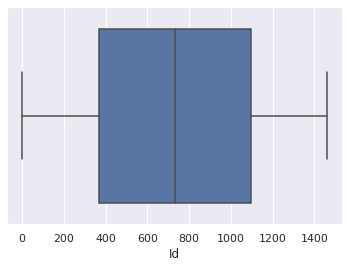

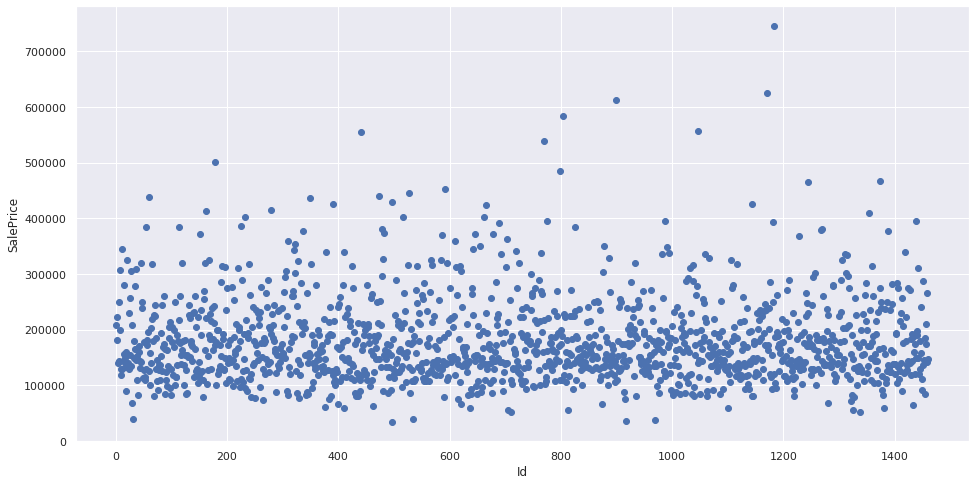

MSSubClass
MSZoning
LotFrontage


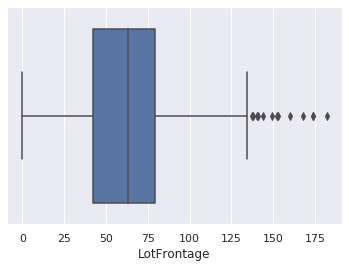

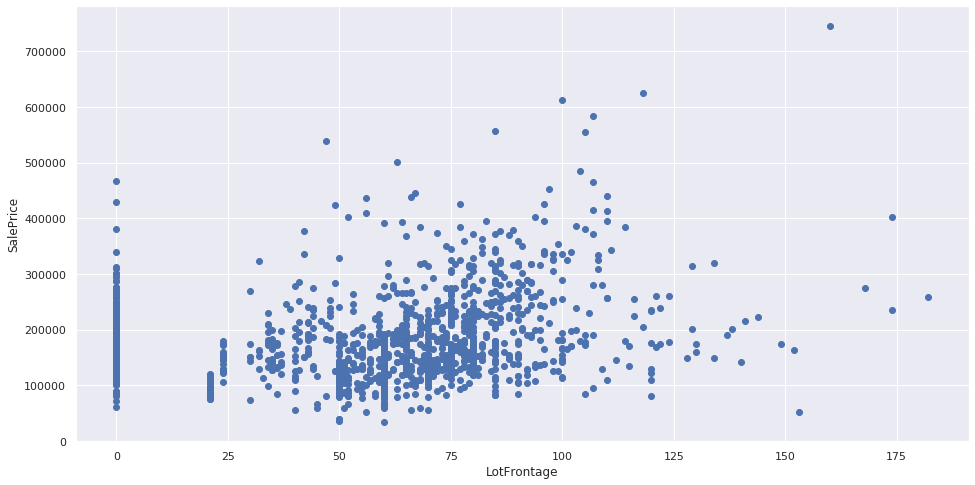

LotArea


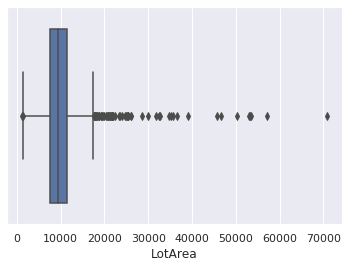

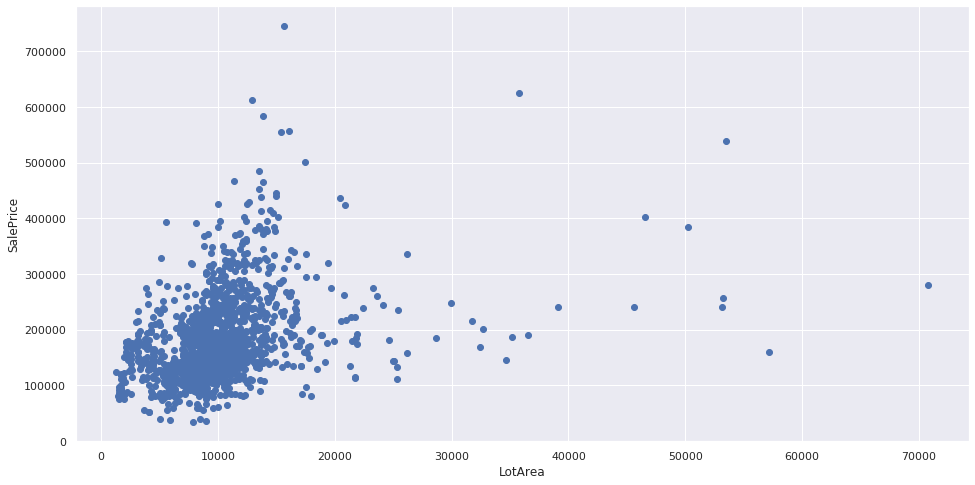

Street


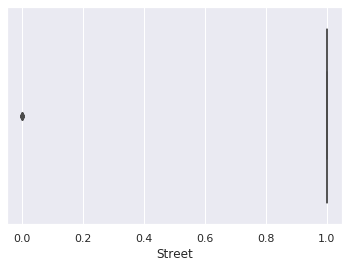

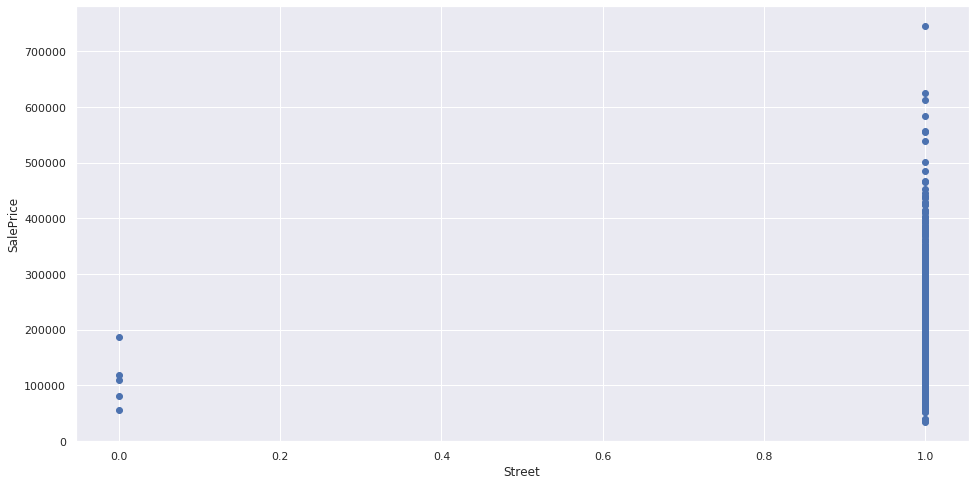

Alley


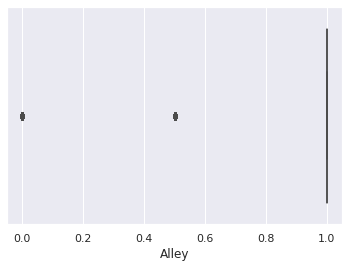

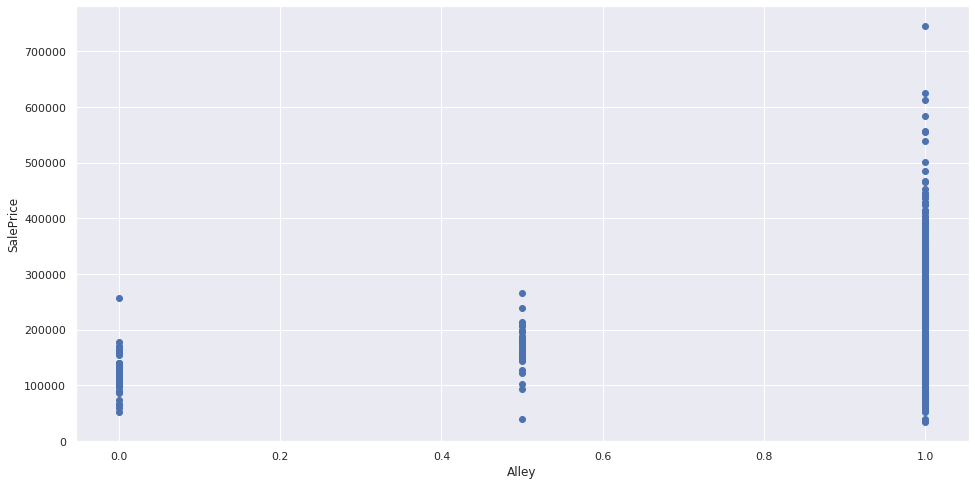

LotShape


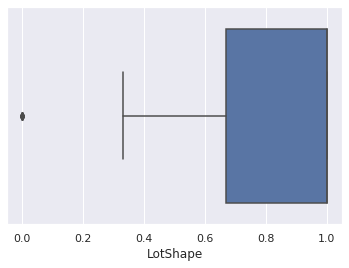

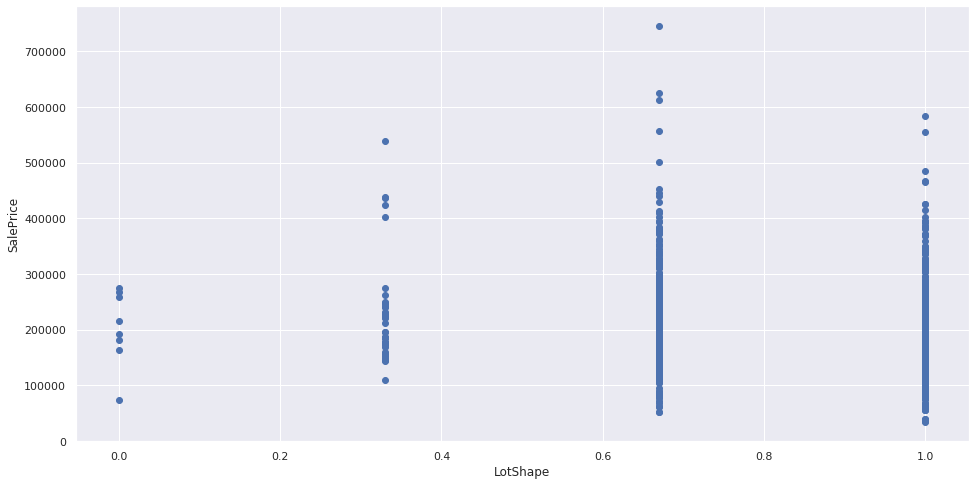

LandContour


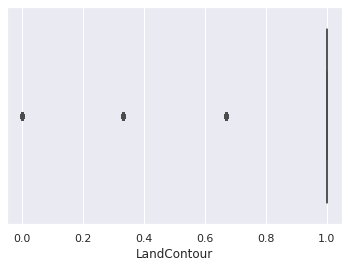

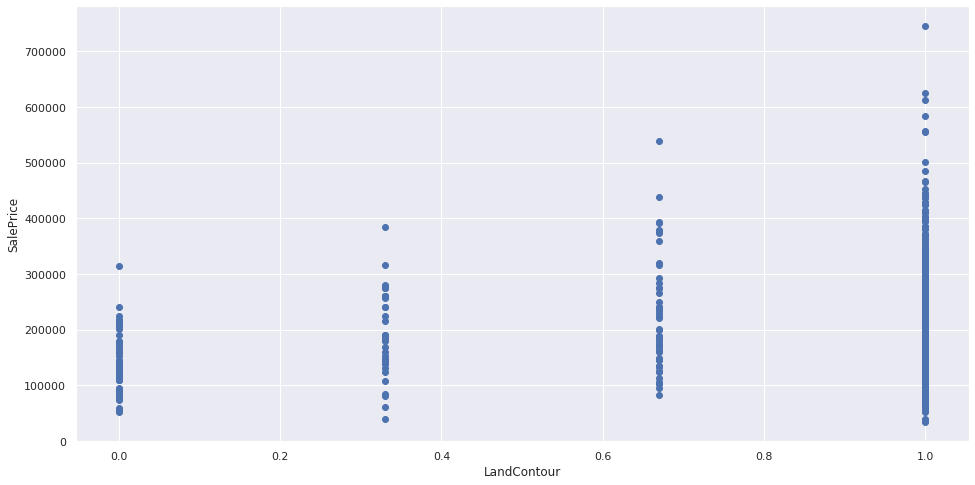

Utilities
LotConfig


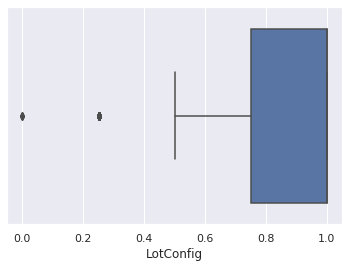

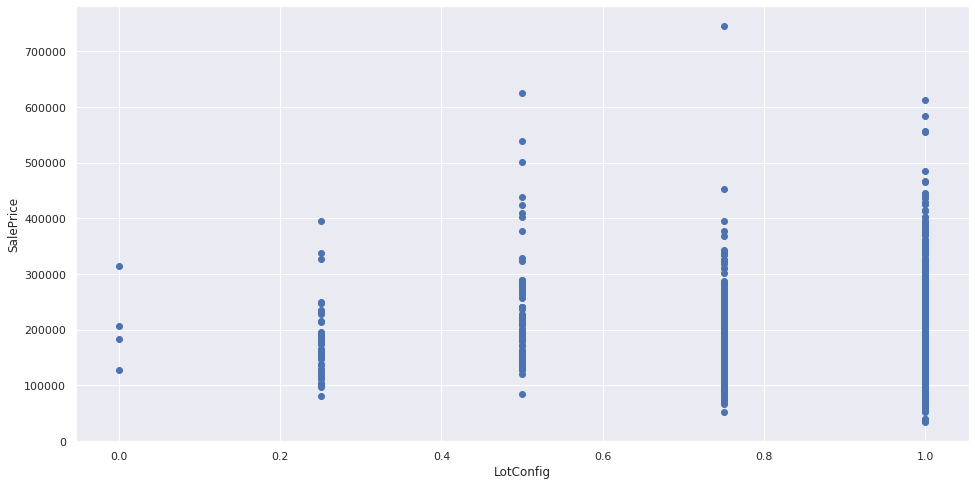

LandSlope


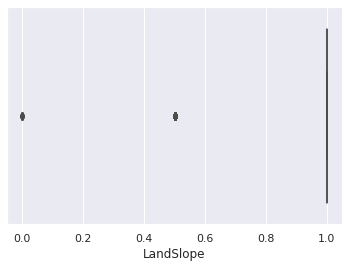

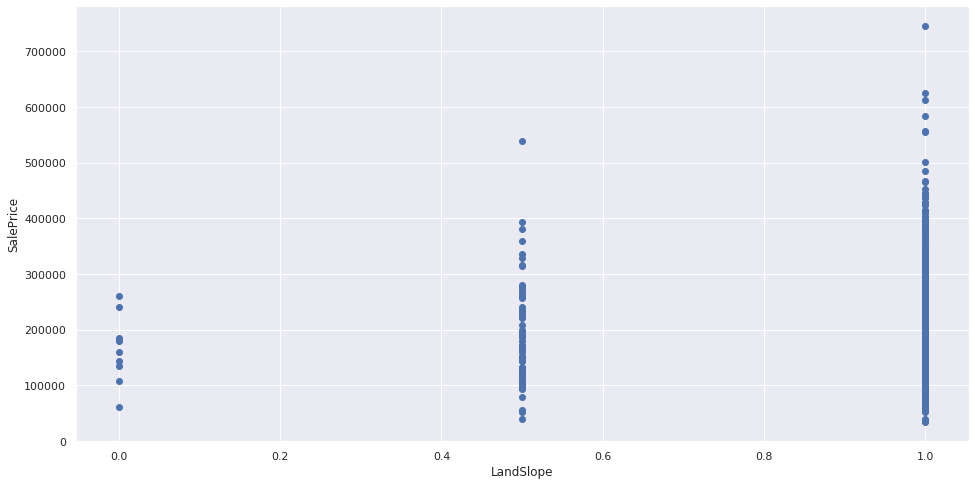

Neighborhood


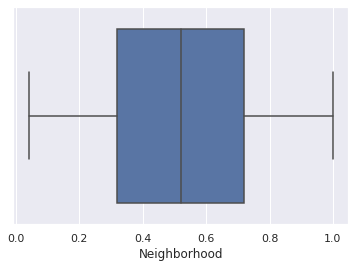

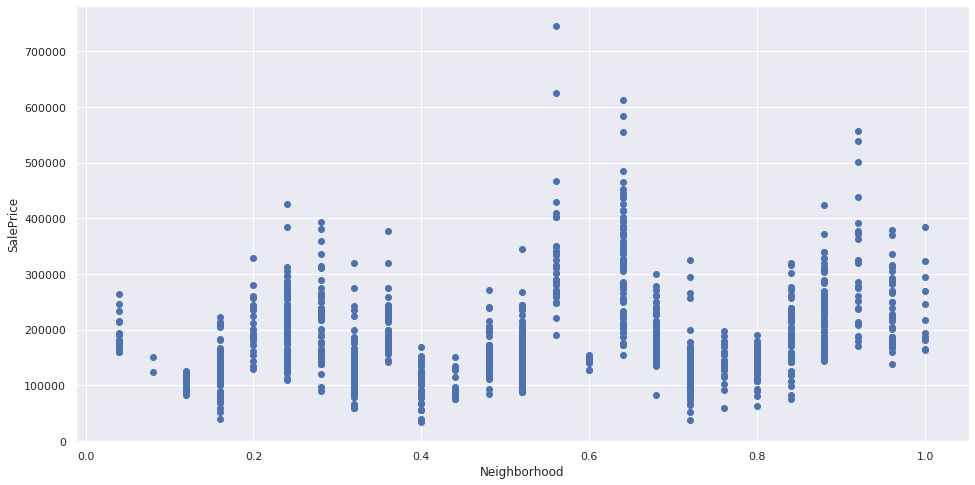

Condition1


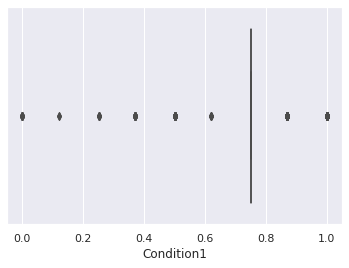

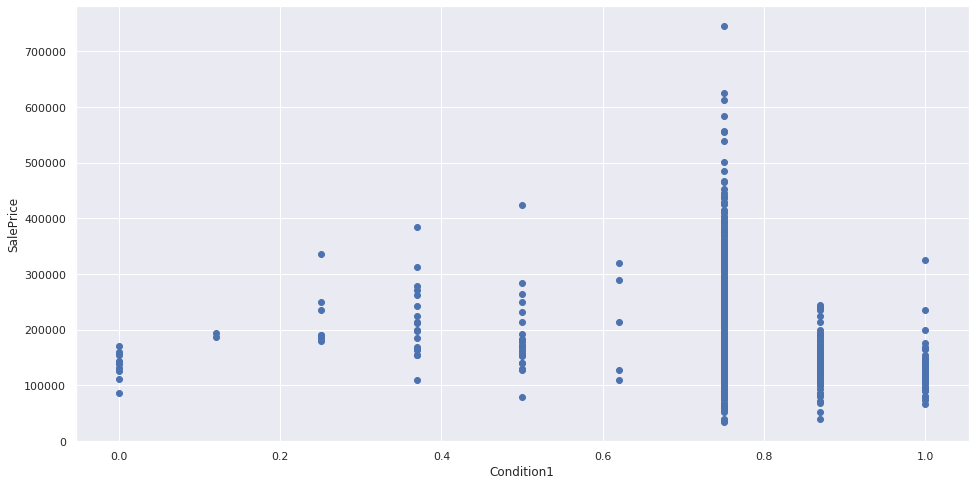

Condition2


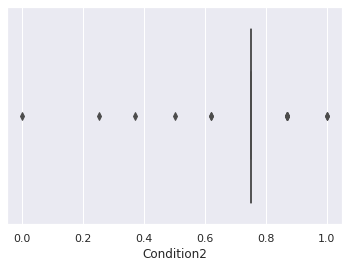

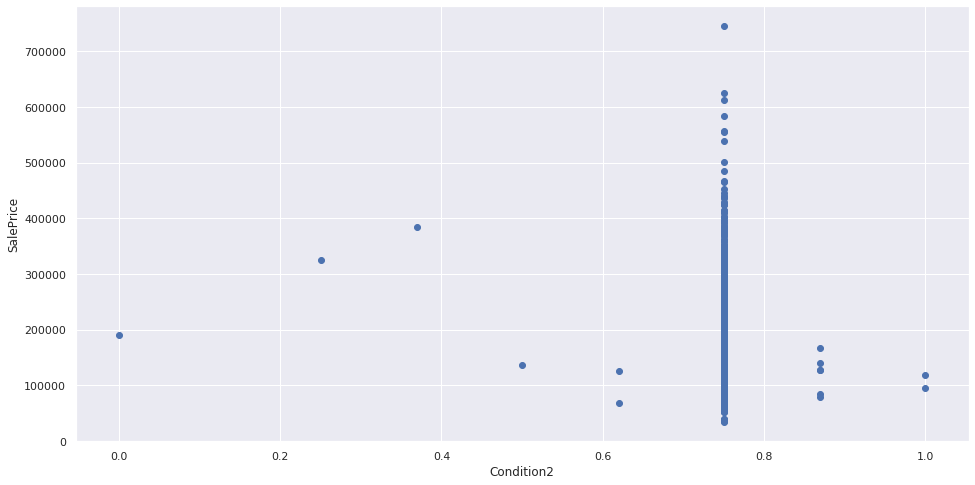

BldgType


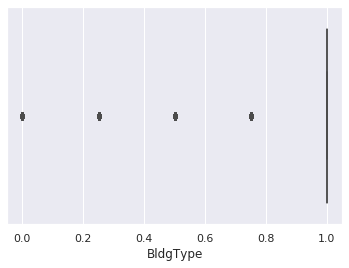

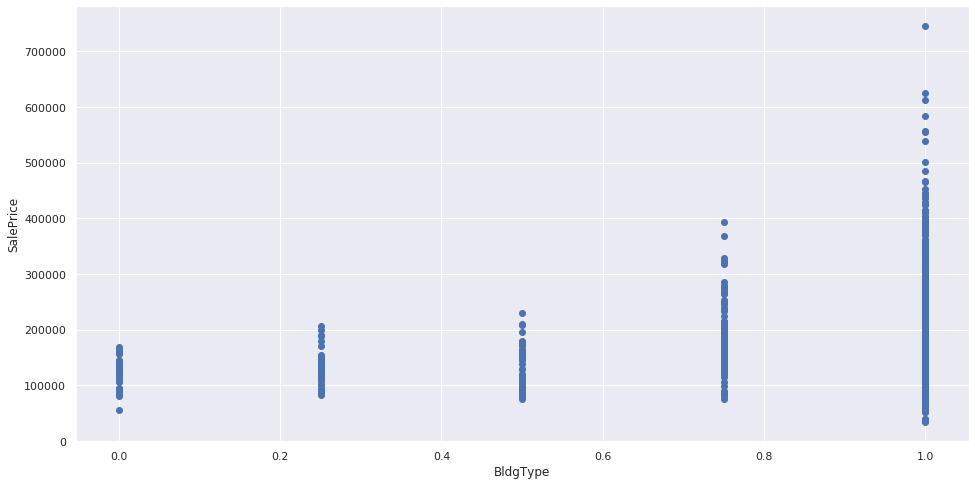

HouseStyle


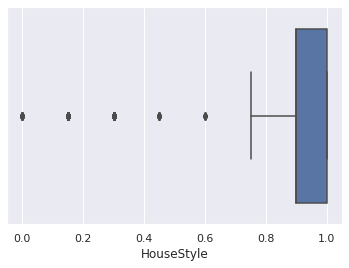

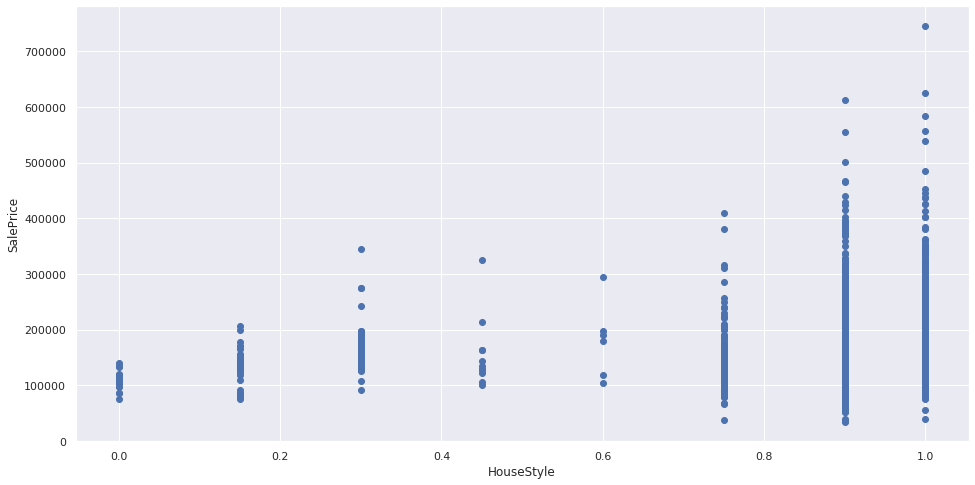

OverallQual


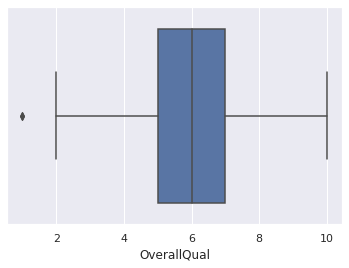

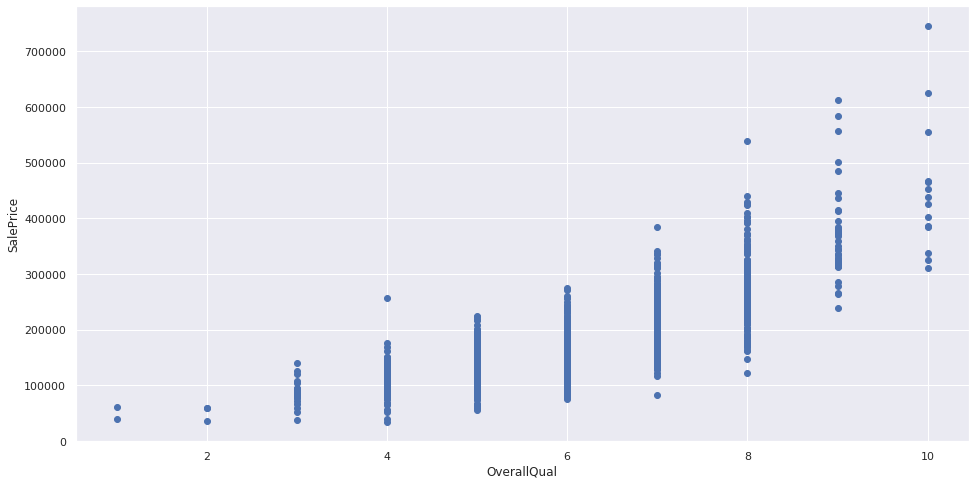

OverallCond


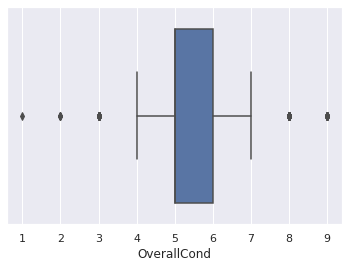

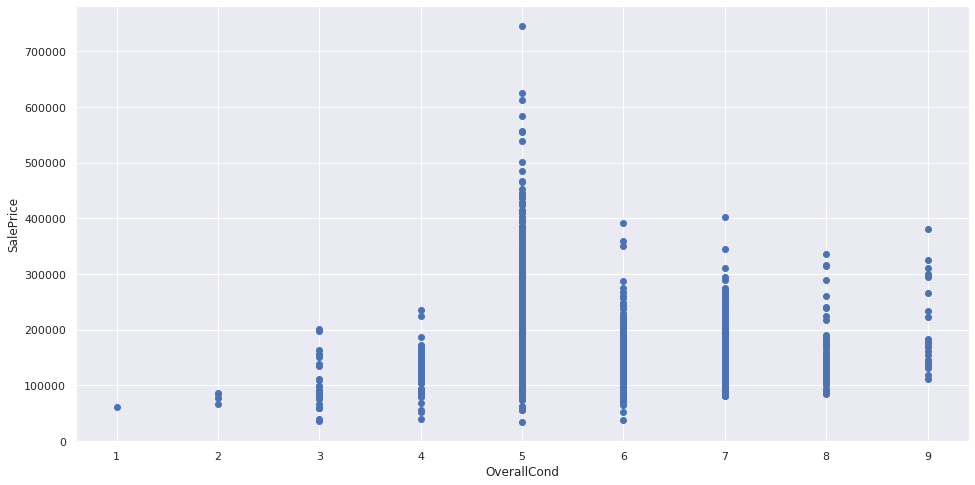

YearBuilt


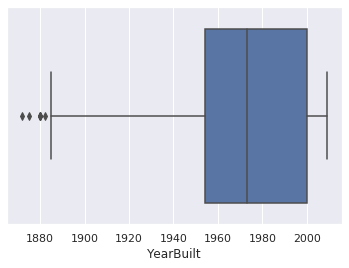

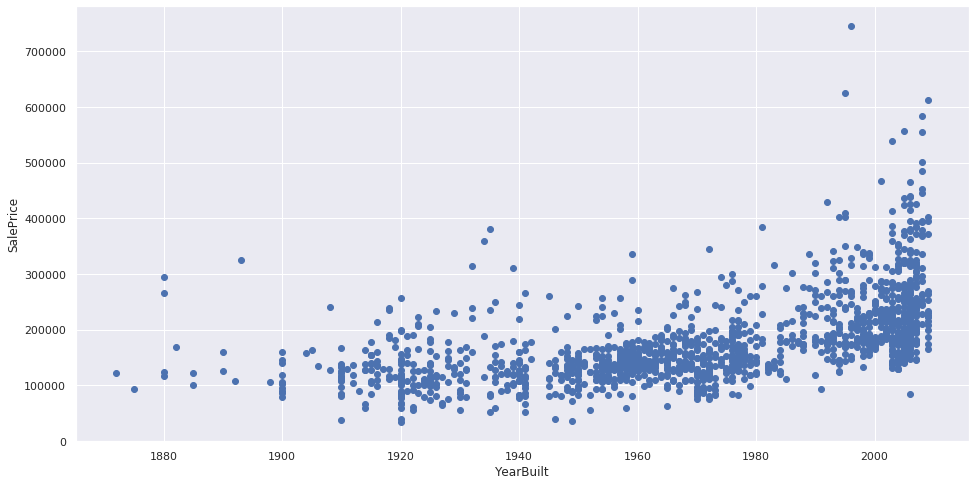

YearRemodAdd


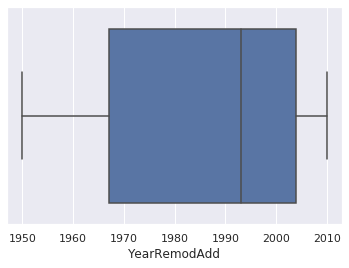

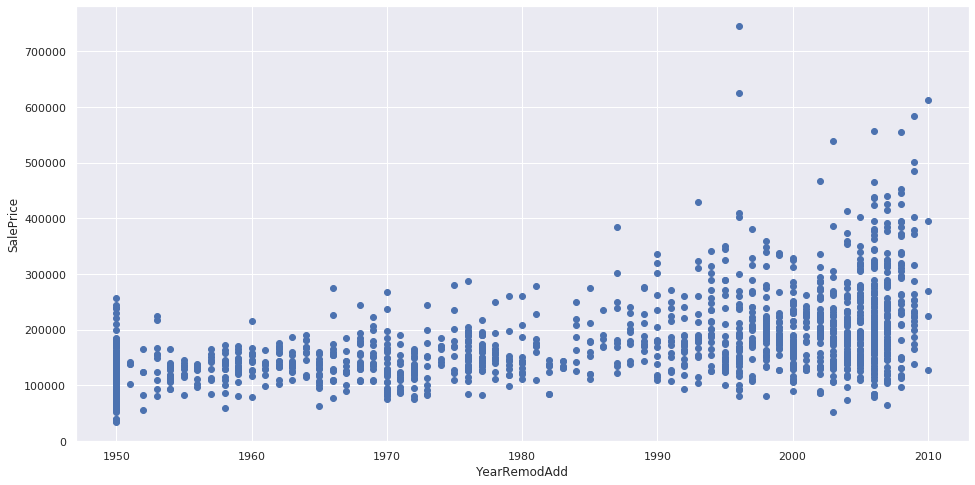

RoofStyle


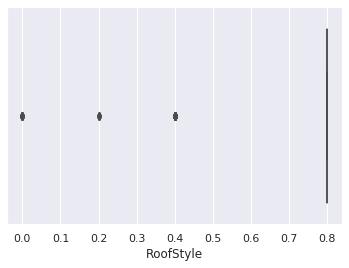

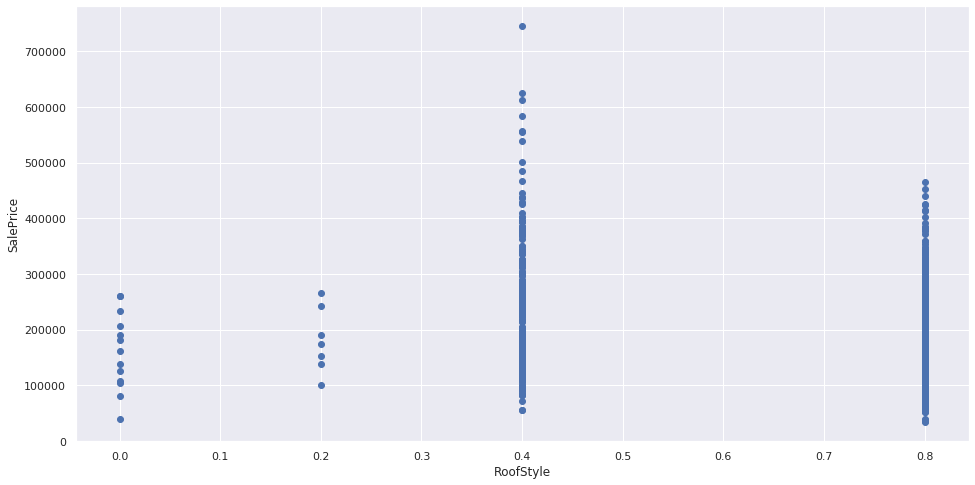

RoofMatl


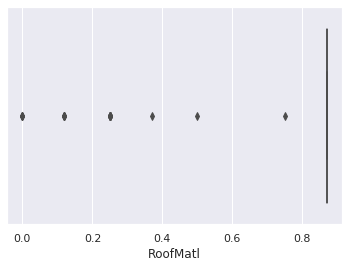

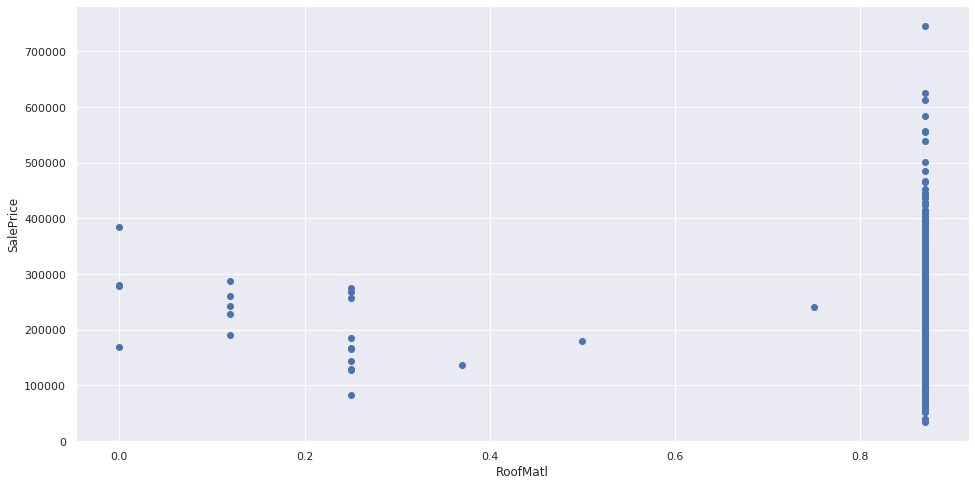

Exterior1st


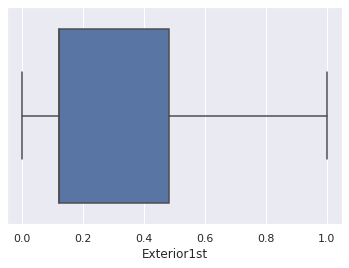

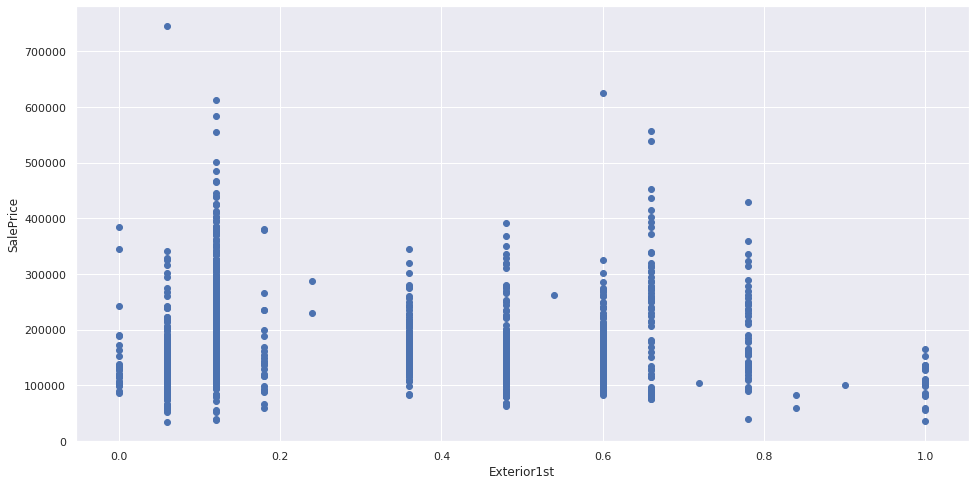

Exterior2nd


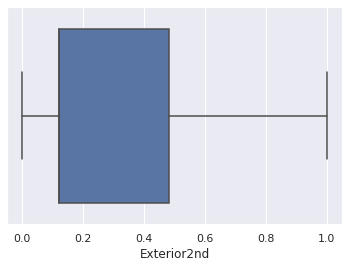

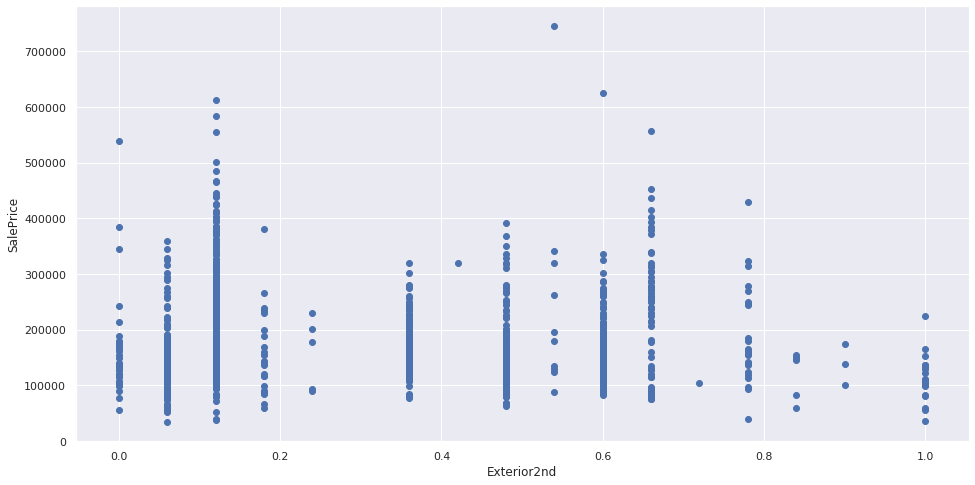

MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1


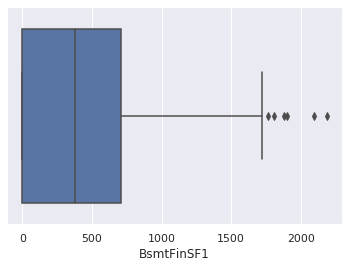

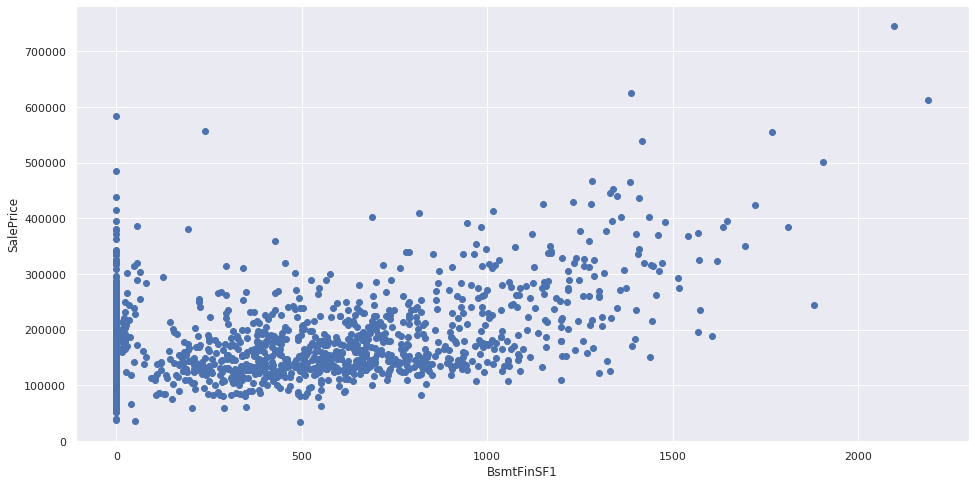

BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF


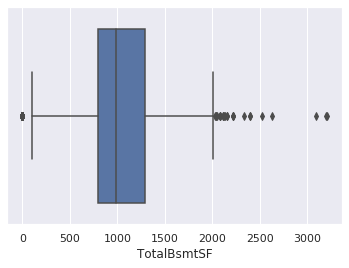

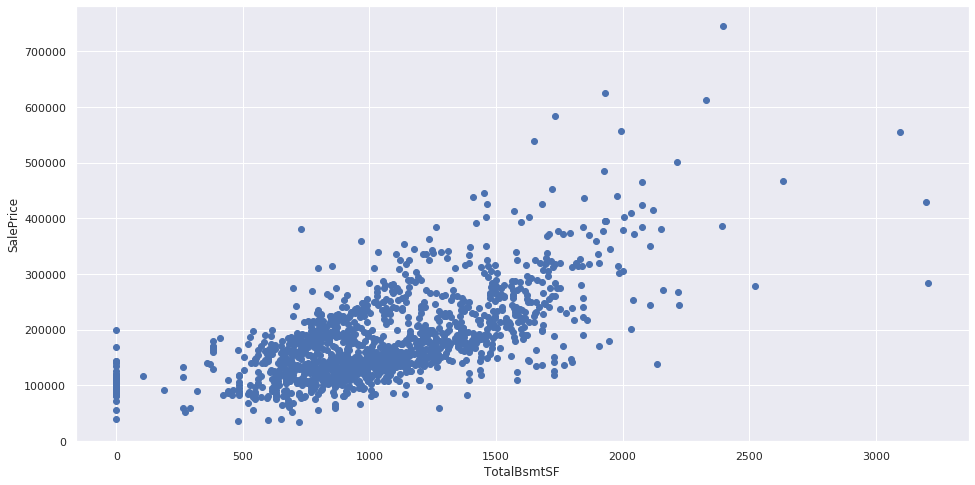

Heating


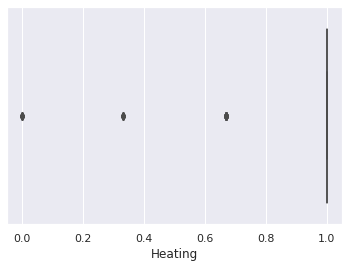

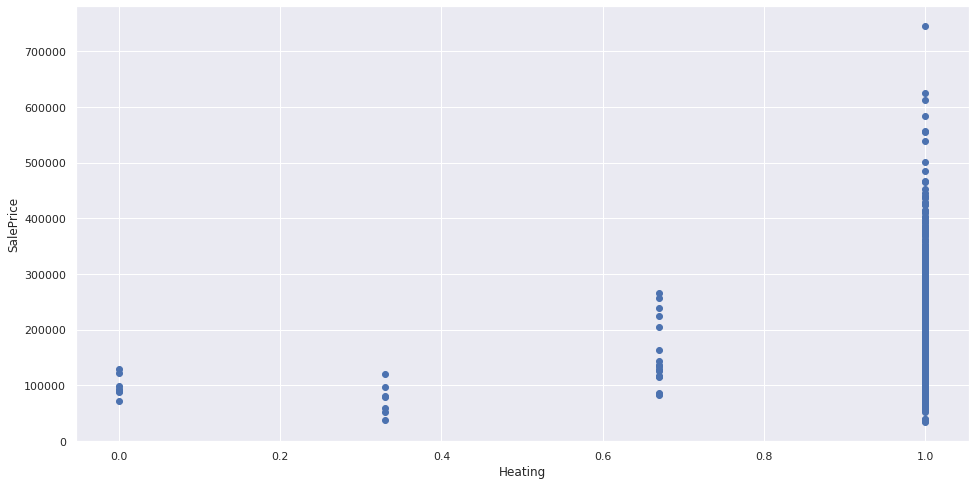

HeatingQC
CentralAir
Electrical
1stFlrSF


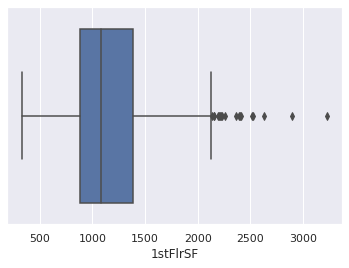

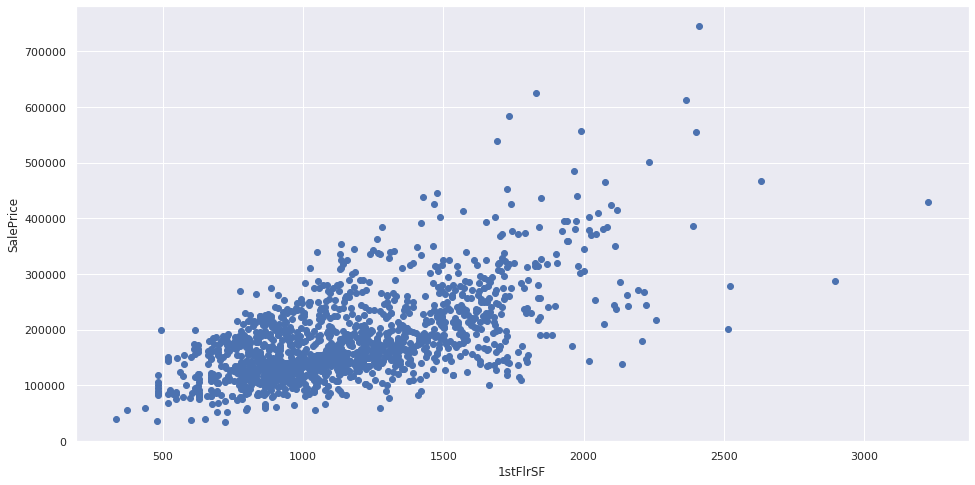

2ndFlrSF


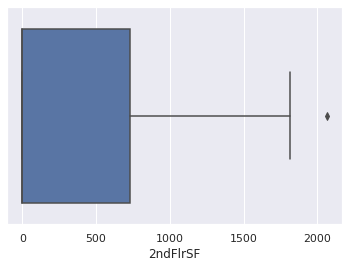

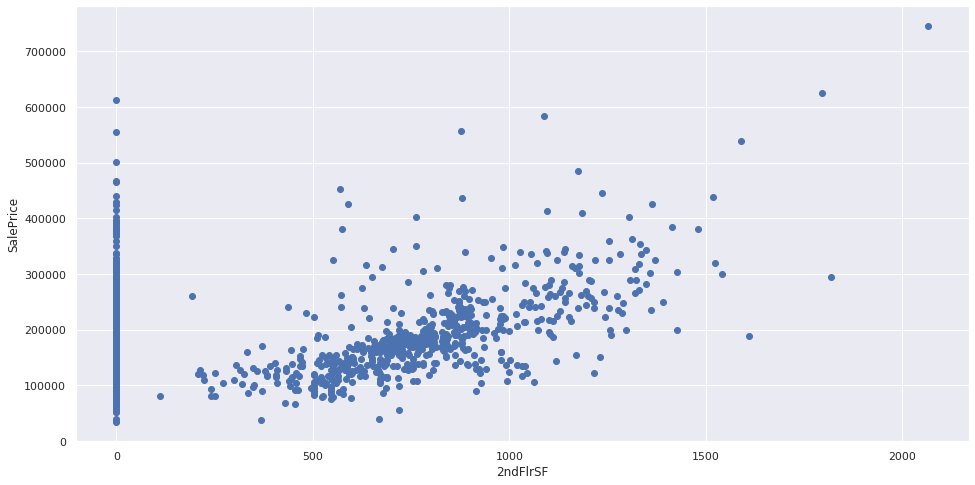

LowQualFinSF
GrLivArea


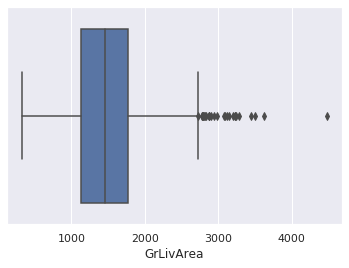

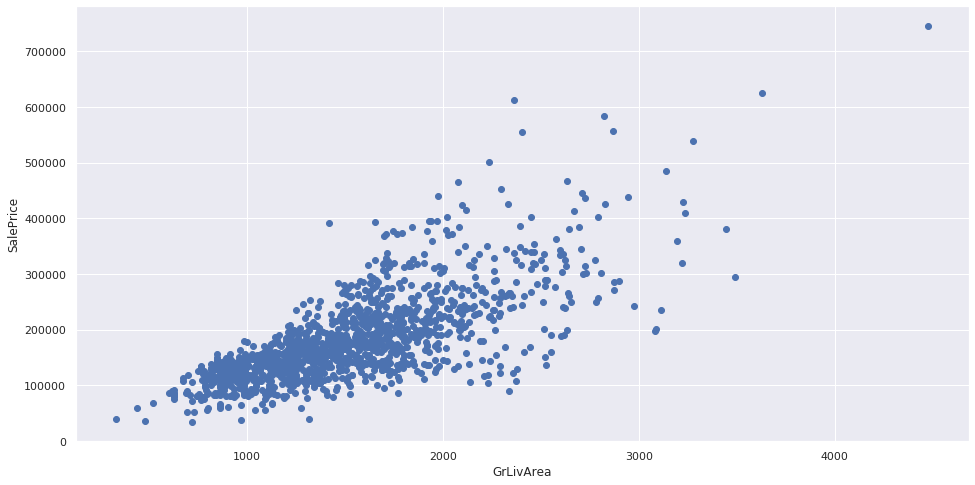

BsmtFullBath


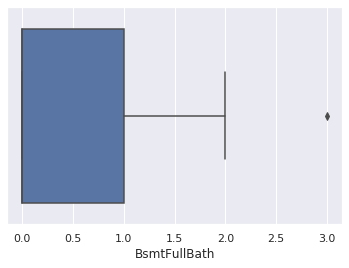

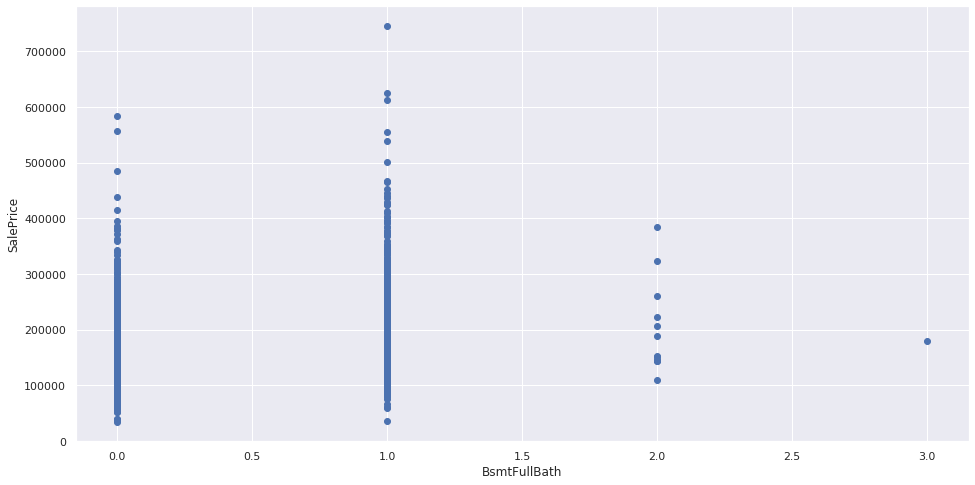

BsmtHalfBath


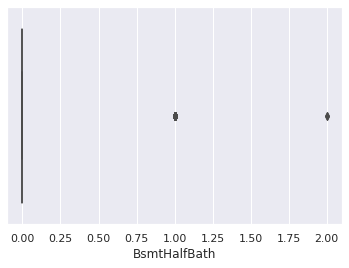

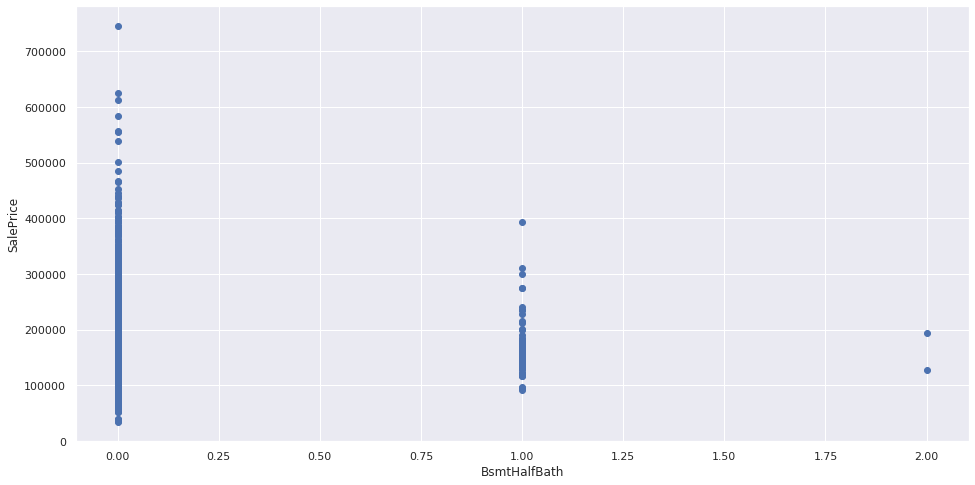

FullBath


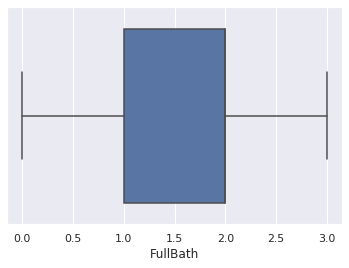

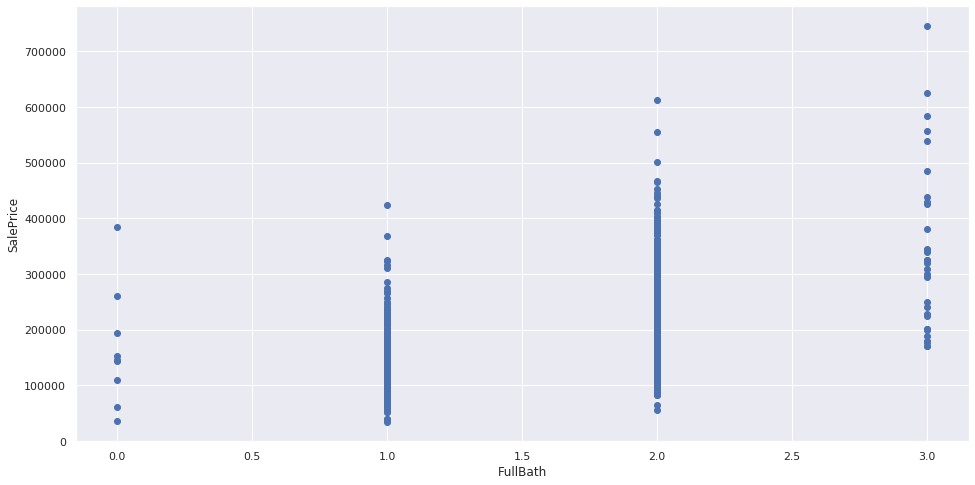

HalfBath


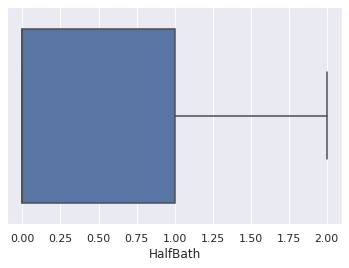

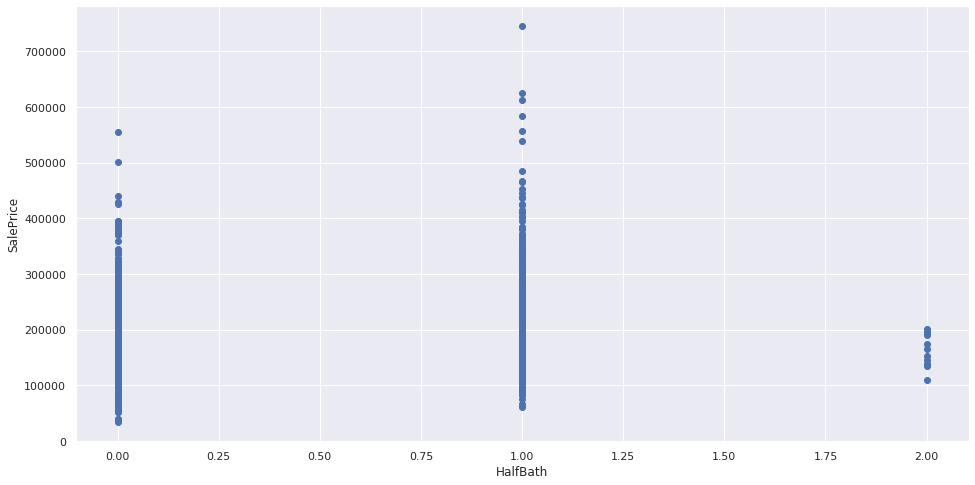

BedroomAbvGr


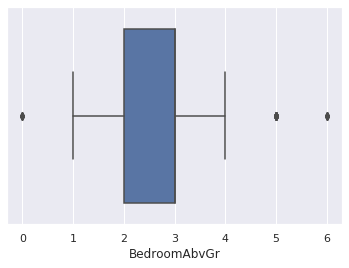

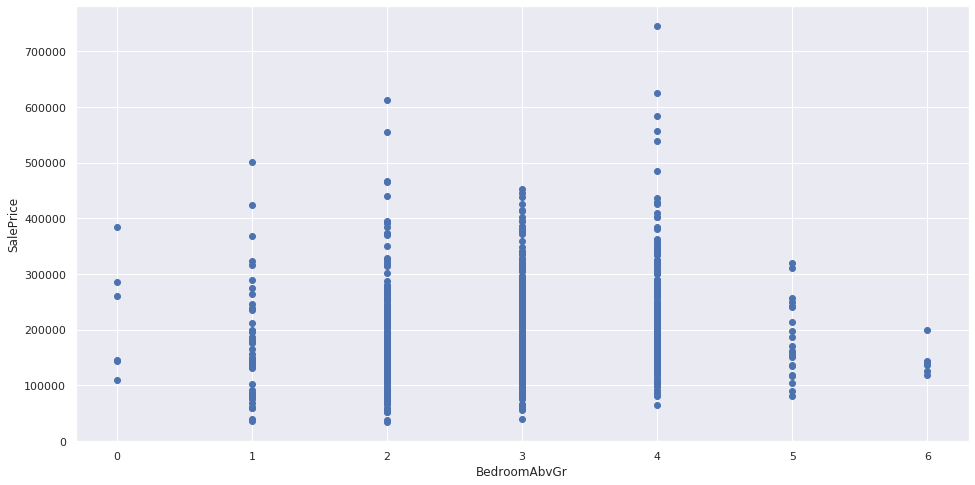

KitchenAbvGr


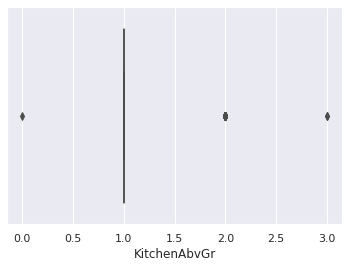

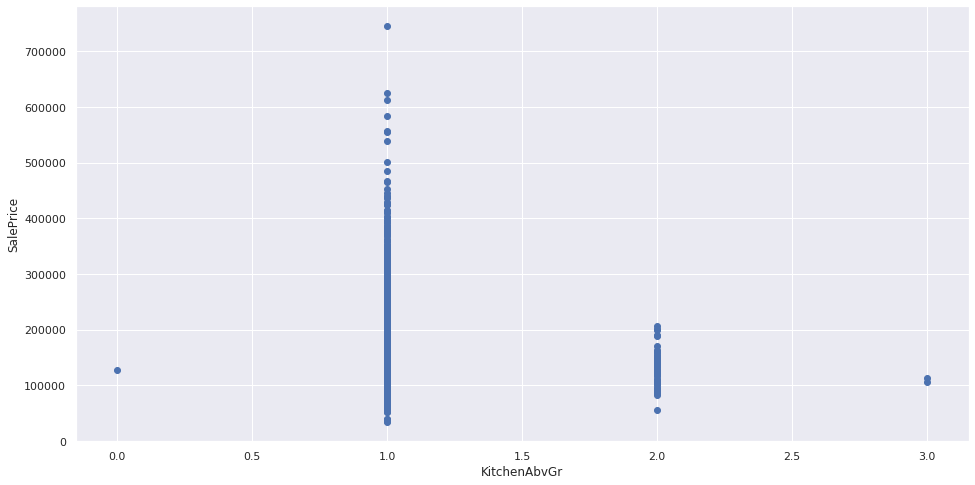

KitchenQual
TotRmsAbvGrd


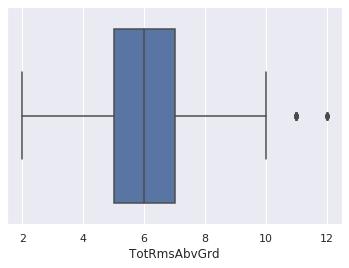

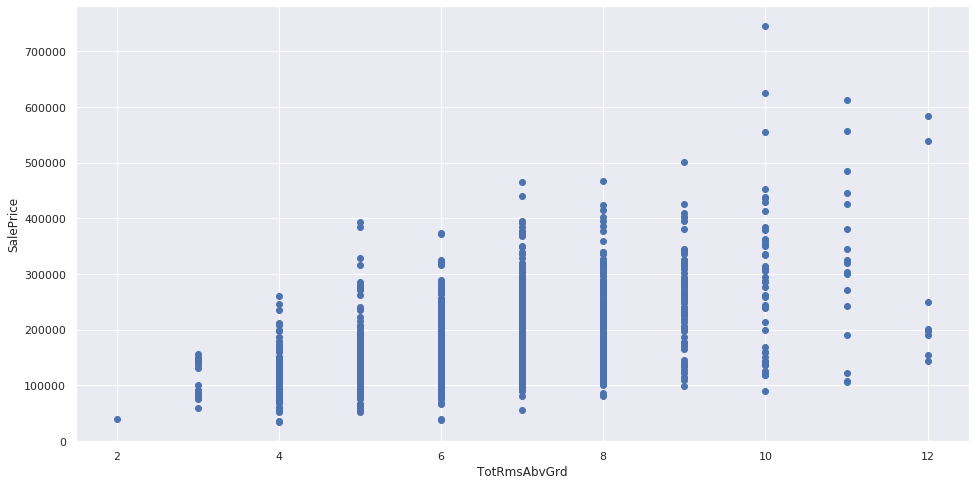

Functional
Fireplaces


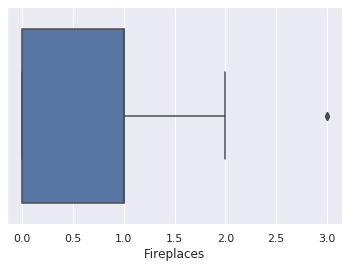

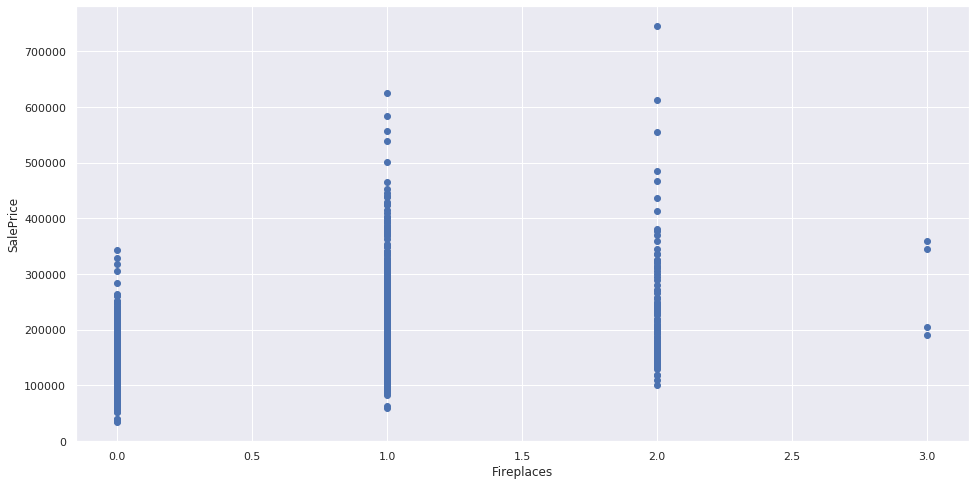

FireplaceQu
GarageType
GarageYrBlt


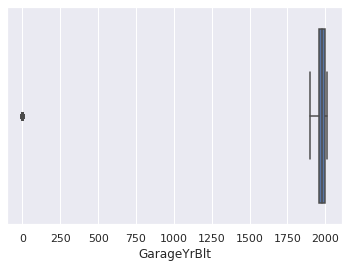

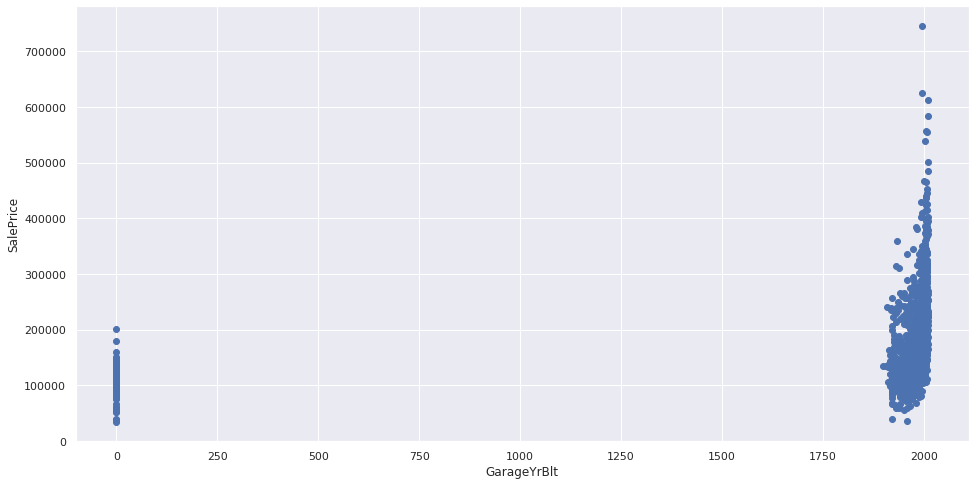

GarageFinish
GarageCars


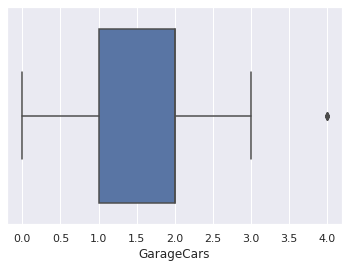

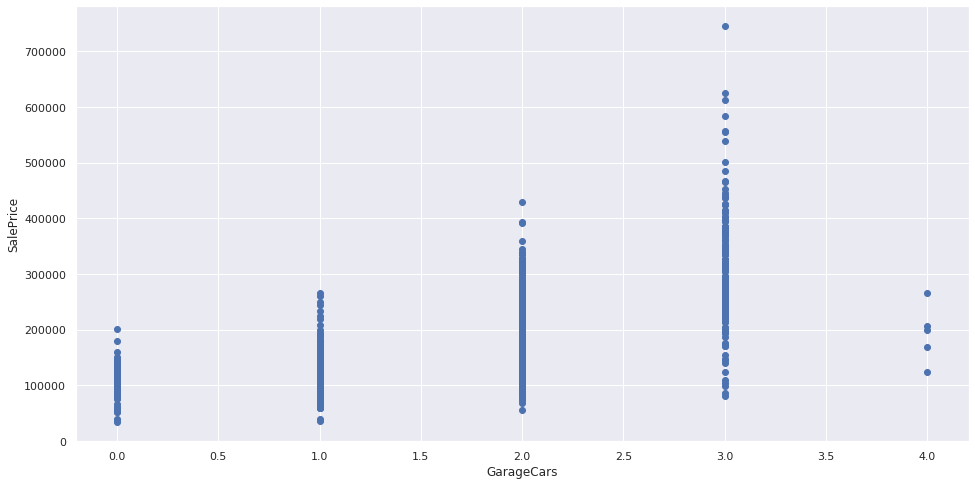

GarageArea


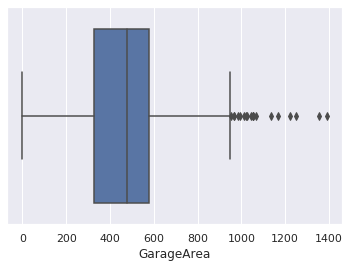

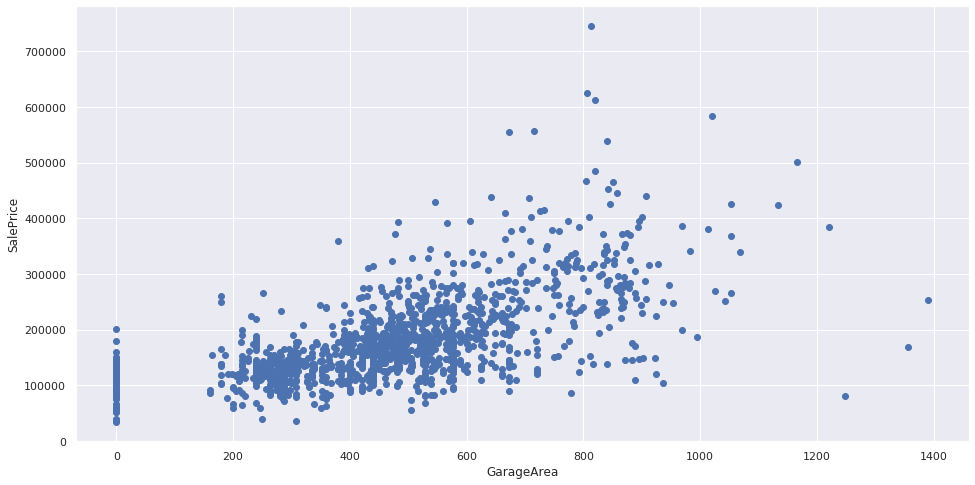

GarageQual
GarageCond
PavedDrive
WoodDeckSF


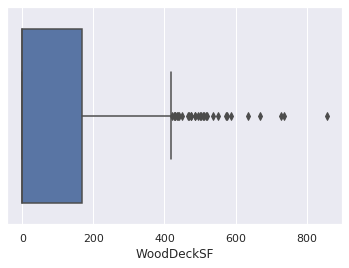

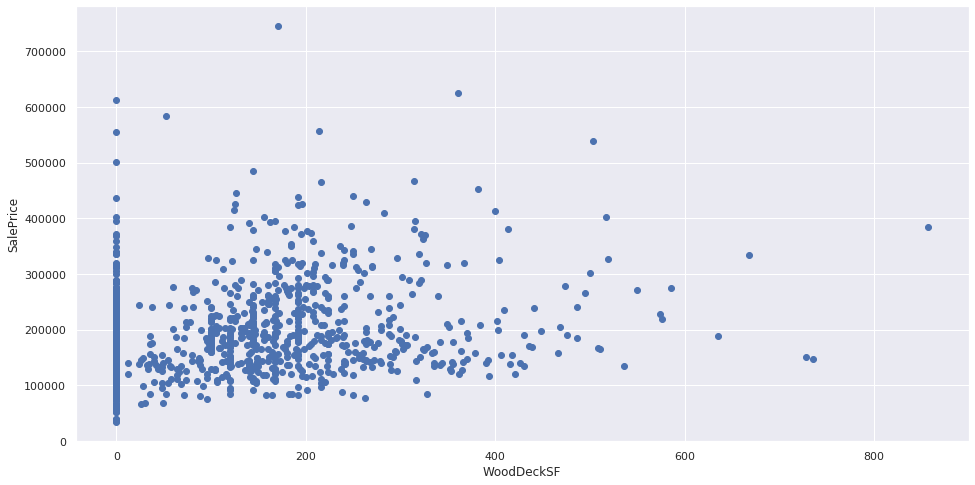

OpenPorchSF


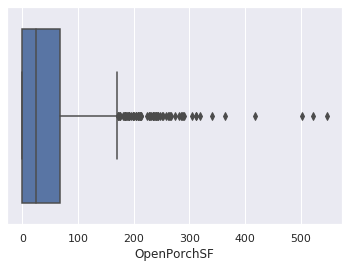

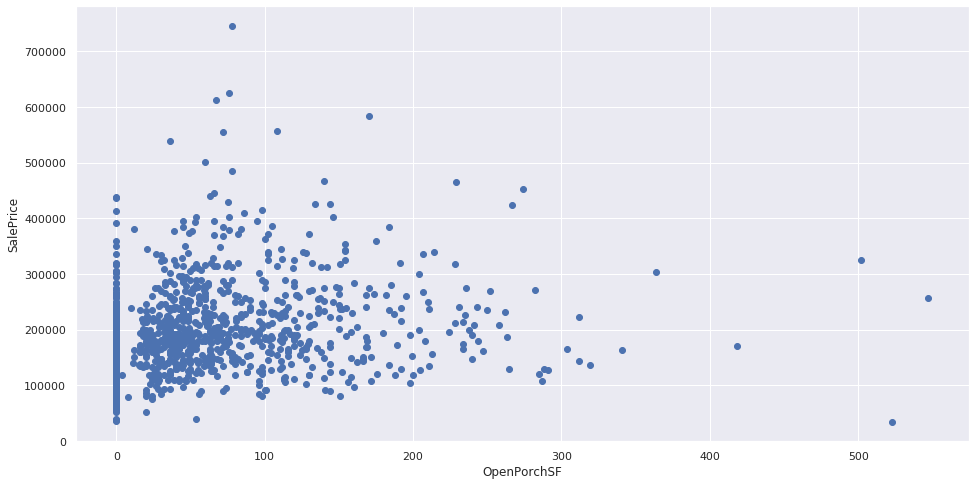

EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition


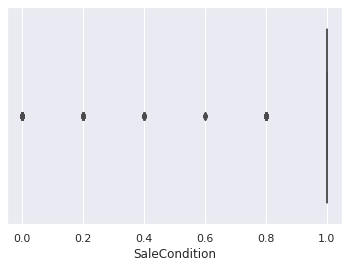

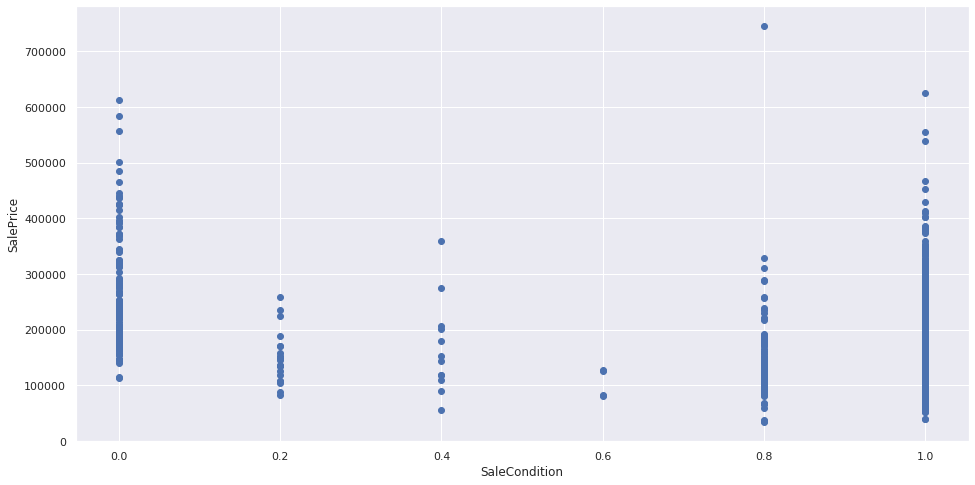

SalePrice


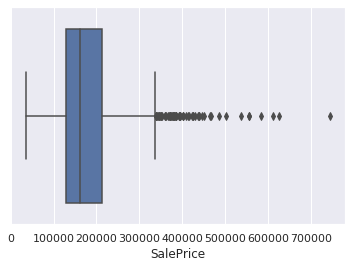

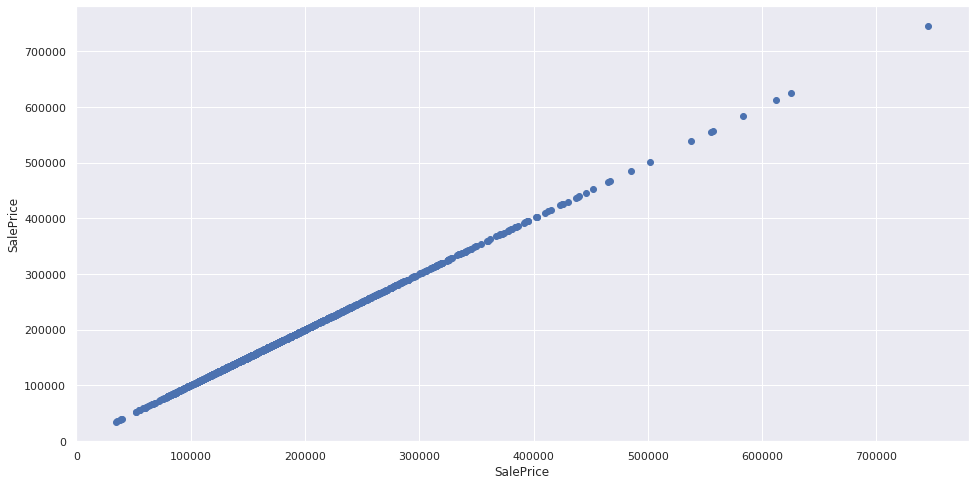

In [0]:

for i in normalizedTrainingData.columns:
  print(i)
  if i in listOfExcludedAttributes + attributesLeftToMakeFiltersFor: 
    continue
  # attributeToCheck = "HalfBath"
  attributeToCheck = i


  import seaborn as sns
  sns.boxplot(x=dataWithoutOutliers[attributeToCheck])

  fig, ax = plt.subplots(figsize=(16,8))
  ax.scatter(dataWithoutOutliers[attributeToCheck], dataWithoutOutliers['SalePrice'])
  ax.set_xlabel(attributeToCheck)
  ax.set_ylabel('SalePrice')
  plt.show()

  normalizedTrainingData[attributeToCheck].describe()

In [0]:
# attribute = normalizedTrainingData["LotFrontage"]

# for i in range(len(attribute)):
#   if str(attribute[i]) == "nan":
#     print(attribute[i], i)


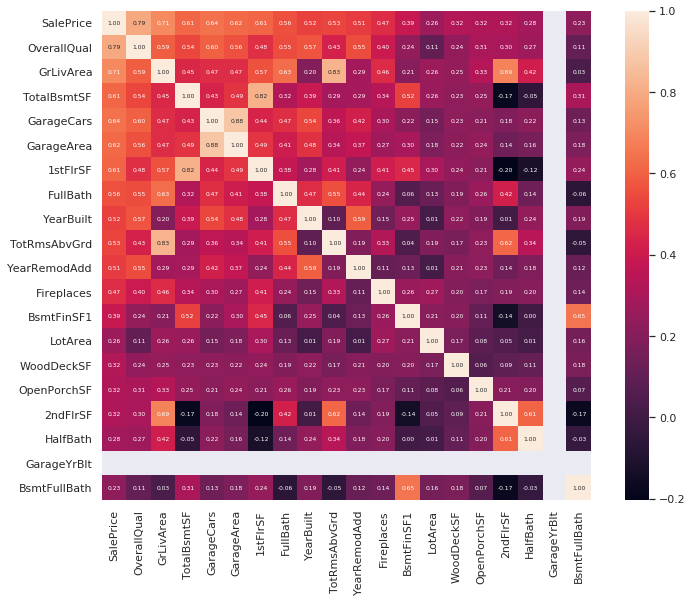

In [0]:
import seaborn as sns

heatMap = trainDataV3.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(heatMap, vmax=.8, square=True);

#Straigt from tutorial no kaggle!!

k = 20 #number of variables for heatmap
cols = heatMap.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataTrain[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
justAFewAttributesThatHaveHigherCorralation = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "GarageArea", "1stFlrSF", "FullBath", "YearBuilt", "TotRmsAbvGrd", "YearRemodAdd", "Fireplaces", "BsmtFinSF1"]
# attributesForPreditionFromCorrelationMatrix = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]  #OLD :/

In [0]:
raw = [0.07, 0.14, 0.07]
norm = [float(i)/sum(raw) for i in raw]
print(raw, norm)

[0.07, 0.14, 0.07] [0.25, 0.5, 0.25]


In [0]:
test = trainDataV3["LotFrontage"].tolist()
print(test)
norm = [float(i)/sum(test) for i in test]
print(norm)
print(type(norm[0]))
print(type(np.float32(norm[0])))

[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 0.0, 51.0, 50.0, 70.0, 85.0, 0.0, 91.0, 0.0, 51.0, 0.0, 72.0, 66.0, 70.0, 101.0, 57.0, 75.0, 44.0, 0.0, 110.0, 60.0, 98.0, 47.0, 60.0, 50.0, 0.0, 85.0, 70.0, 60.0, 108.0, 112.0, 74.0, 68.0, 65.0, 84.0, 115.0, 0.0, 0.0, 70.0, 61.0, 48.0, 84.0, 33.0, 66.0, 0.0, 52.0, 110.0, 68.0, 60.0, 100.0, 24.0, 89.0, 66.0, 60.0, 63.0, 60.0, 44.0, 50.0, 0.0, 76.0, 0.0, 72.0, 47.0, 81.0, 95.0, 69.0, 74.0, 85.0, 60.0, 21.0, 0.0, 50.0, 72.0, 60.0, 100.0, 32.0, 78.0, 80.0, 0.0, 121.0, 122.0, 40.0, 105.0, 60.0, 60.0, 85.0, 80.0, 60.0, 69.0, 0.0, 78.0, 73.0, 85.0, 77.0, 0.0, 77.0, 64.0, 94.0, 0.0, 75.0, 60.0, 50.0, 85.0, 105.0, 75.0, 0.0, 77.0, 0.0, 61.0, 34.0, 0.0, 74.0, 90.0, 65.0, 0.0, 50.0, 75.0, 55.0, 48.0, 60.0, 0.0, 55.0, 69.0, 69.0, 88.0, 0.0, 75.0, 0.0, 78.0, 80.0, 0.0, 82.0, 73.0, 65.0, 70.0, 78.0, 71.0, 78.0, 70.0, 24.0, 51.0, 0.0, 63.0, 0.0, 120.0, 107.0, 0.0, 0.0, 84.0, 60.0, 60.0, 92.0, 100.0, 134.0, 0.0, 110.0, 95.0, 55.0, 40.0, 62.0, 0.0, 86.0, 62.0

## Making and saving a prediction from test data

In [0]:
# Trying to rewrite code block from under

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import math

submitAttributes = []
for i in finalAttributes:
  if i not in ["Id", "SalePrice"]:
    submitAttributes.append(i)

y = trainDataV3.SalePrice
X = trainDataV3[submitAttributes]
print("y", len(y), " - X", len(X))

# for i in X:
#   # print(i, X[i].unique())
#   print(trainDataV3[i])



# split data into training data and testing data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


#make our first model, its a descision tree
model1 = DecisionTreeRegressor(random_state=1)
model1.fit(train_X, train_y)
#predict and find mae
val_predicitons1 = model1.predict(val_X)
val_mae1 = mean_absolute_error(val_predicitons1, val_y)
print("validation mean absolute error without specifying max_leaf_nodes: {:,.0f}".format(val_mae1))

#predict and find mae for max_leaf_nodes = 5, 10 or 100 might be the best for minimizing the MAE
model2 = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
model2.fit(train_X, train_y)
val_predicitons2 = model2.predict(val_X)
val_mae2 = mean_absolute_error(val_predicitons2, val_y)
print("validation mean absolute error with specifying max_leaf_nodes: {:,.0f}".format(val_mae2))

# with random forest regressor
finalModel = RandomForestRegressor(random_state=1)
finalModel.fit(train_X, train_y)
finalModel_val_predictions = finalModel.predict(val_X)
finalModelMAE = mean_absolute_error(finalModel_val_predictions, val_y)
print("Validation MAE for final model: {:,.0f}".format(finalModelMAE))



submitModel = RandomForestRegressor()

submitModel.fit(X, y)

# print(X, y)

test_X = dataTest[submitAttributes].astype("float32")

test_X = test_X[0:-1]
print(len(test_X), test_X)

for i in test_X:
  for j in range(len(test_X[i])):
    if math.isnan(test_X[i][j]):
      # print(i, j, test_X[i][j])
      # trainDataV3.at[j, i] = 0
      # dataTest.at[j, i] = 0
      test_X.at[j, i] = 0

for i in test_X:
  for j in test_X[i]:
    if j > 100000 or j < -100000:
      print(i, j)

    if type(j) != float:
      print(type(j))

    if math.isnan(j):
      print(i, j)


test_preds = submitModel.predict(test_X)

# dataTest.Id.describe()
# print(test_preds, len(test_preds))
# print(test_X)
# print(test_preds)
# dataTest.Id[0:-1]  dont know why there is one extra Nan value at the end in ID's
dataTest.Id = dataTest.Id[0:-1]
dataTest.Id[0:-1].astype("int32")
submissionIDs = dataTest.Id[0:-1].astype("int32")
print(submissionIDs)

output = pd.DataFrame({'Id': submissionIDs,
                       'SalePrice': test_preds})
output.to_csv('submission6.csv', index=False)
print(output)



y 1449  - X 1449
validation mean absolute error without specifying max_leaf_nodes: 27,508
validation mean absolute error with specifying max_leaf_nodes: 26,119
Validation MAE for final model: 17,063
1459       LotFrontage  LotArea  Street  ...  WoodDeckSF  OpenPorchSF  SaleCondition
0            80.0  11622.0     1.0  ...       140.0          0.0            1.0
1            81.0  14267.0     1.0  ...       393.0         36.0            1.0
2            74.0  13830.0     1.0  ...       212.0         34.0            1.0
3            78.0   9978.0     1.0  ...       360.0         36.0            0.8
4            43.0   5005.0     1.0  ...         0.0         82.0            1.0
...           ...      ...     ...  ...         ...          ...            ...
1454         21.0   1936.0     1.0  ...         0.0          0.0            1.0
1455         21.0   1894.0     1.0  ...         0.0         24.0            1.0
1456        160.0  20000.0     1.0  ...       474.0          0.0            

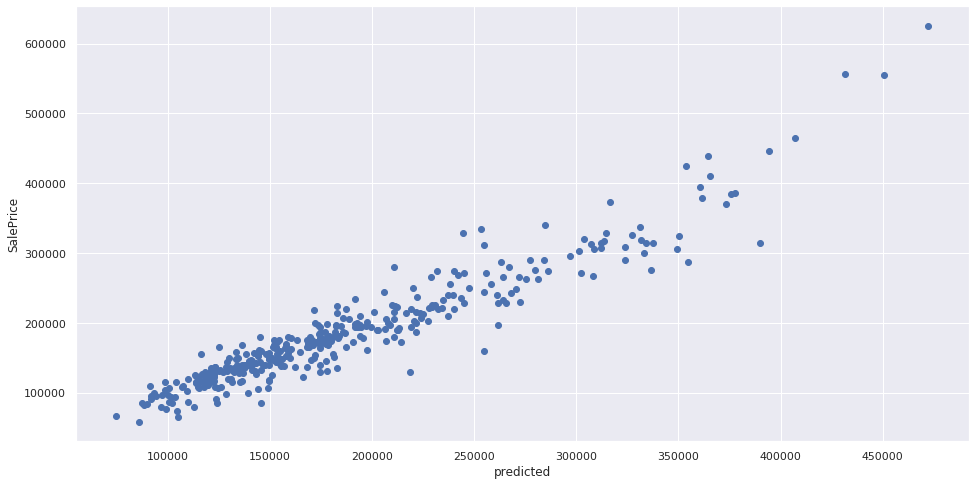

In [0]:
finalModel_val_predictions

val_y

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(finalModel_val_predictions, val_y)
ax.set_xlabel("predicted")
ax.set_ylabel('SalePrice')
plt.show()

In [0]:
## --  MOSTLY JUST FROM THE KAGGLE EXERCISE::

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# suggestion of attributes from kaggle-learn exercise::
# attributesForPredition = ["LotArea", "YearBuild", "1stFlrSF", "2ndFlrSF", "FullBath", "BedrooomAbvGr", "TotRmsAbsGrd"]
# attributesForPredition = ["Alley", "OverallQual", "BedroomAbvGr", "PoolArea"]
attributesForPreditionFromCorrelationMatrix = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]

# print(normalizedTrainingData.columns)

for col in normalizedTrainingData:
  if col in attributesForPreditionFromCorrelationMatrix:
    # print(col, "\n", normalizedTrainingData[col])
    None


# we are trying to predict y prices with X values
y = normalizedTrainingData.SalePrice
X = normalizedTrainingData[attributesForPreditionFromCorrelationMatrix]

# split data into training data and testing data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#make our first model, its a descision tree
model1 = DecisionTreeRegressor(random_state=1)
#fit model
model1.fit(train_X, train_y)

#predict and find mae
val_predicitons1 = model1.predict(val_X)
val_mae1 = mean_absolute_error(val_predicitons1, val_y)
print("validation mean absolute error without specifying max_leaf_nodes: {:,.0f}".format(val_mae1))

#predict and find mae for max_leaf_nodes = 5, 10 or 100 might be the best for minimizing the MAE
model2 = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
model2.fit(train_X, train_y)
val_predicitons2 = model2.predict(val_X)
val_mae2 = mean_absolute_error(val_predicitons2, val_y)
print("validation mean absolute error with specifying max_leaf_nodes: {:,.0f}".format(val_mae2))

# with random forest regressor
finalModel = RandomForestRegressor(random_state=1)
finalModel.fit(train_X, train_y)
finalModel_val_predictions = finalModel.predict(val_X)
finalModelMAE = mean_absolute_error(finalModel_val_predictions, val_y)
print("Validation MAE for final model: {:,.0f}".format(finalModelMAE))



y = normalizedTrainingData.SalePrice
X = normalizedTrainingData[attributesForPreditionFromCorrelationMatrix]

# print(X, y)

submitModel = RandomForestRegressor()

submitModel.fit(X, y)
# print(X, y, submitModel)

# test_X = normalizedTrainingData[attributesForPreditionFromCorrelationMatrix]
test_X = dataTest[attributesForPreditionFromCorrelationMatrix]

test_preds = submitModel.predict(test_X)
print(test_X)
print(test_preds)
print(dataTest.Id, test_X)

output = pd.DataFrame({'Id': dataTest.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)
print(output)

validation mean absolute error without specifying max_leaf_nodes: 25,797
validation mean absolute error with specifying max_leaf_nodes: 23,826
Validation MAE for final model: 19,215


ValueError: ignored